In [79]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import operator
from collections import Counter

In [2]:
df = pd.read_csv('pima.csv')

In [3]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
851            5      112             66              0        0  37.8   
852            0      177             60             29      478  34.6   
853            2      158             90              0        0  31.6   
854            3      162             52             38        0  37.2   
855            4      142             86              0        0  44.0   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
print(df['Outcome'].value_counts())

0    500
1    356
Name: Outcome, dtype: int64


In [5]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1)

In [7]:
print(x.shape, X_train.shape, X_test.shape)

(856, 8) (770, 8) (86, 8)


In [8]:
print(y.shape, Y_train.shape, Y_test.shape)

(856,) (770,) (86,)


In [9]:
print(y.mean(), Y_train.mean(), Y_test.mean())

0.4158878504672897 0.4064935064935065 0.5


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, stratify = y)

In [11]:
print(y.mean(), Y_train.mean(), Y_test.mean())

0.4158878504672897 0.4155844155844156 0.4186046511627907


In [12]:
print(x.mean(), X_train.mean(), X_test.mean())

Pregnancies                   3.989486
Glucose                     122.809579
BloodPressure                69.442757
SkinThickness                20.700935
Insulin                      82.671729
BMI                          32.379439
DiabetesPedigreeFunction      0.481374
Age                          33.691589
dtype: float64 Pregnancies                   4.036364
Glucose                     122.945455
BloodPressure                69.051948
SkinThickness                20.670130
Insulin                      82.257143
BMI                          32.252597
DiabetesPedigreeFunction      0.482001
Age                          33.729870
dtype: float64 Pregnancies                   3.569767
Glucose                     121.593023
BloodPressure                72.941860
SkinThickness                20.976744
Insulin                      86.383721
BMI                          33.515116
DiabetesPedigreeFunction      0.475756
Age                          33.348837
dtype: float64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, stratify = y, random_state=1)

In [14]:
print(X_train.mean(), X_test.mean(),x.mean())

Pregnancies                   3.972727
Glucose                     122.676623
BloodPressure                69.503896
SkinThickness                20.876623
Insulin                      81.425974
BMI                          32.470519
DiabetesPedigreeFunction      0.485445
Age                          33.622078
dtype: float64 Pregnancies                   4.139535
Glucose                     124.000000
BloodPressure                68.895349
SkinThickness                19.127907
Insulin                      93.825581
BMI                          31.563953
DiabetesPedigreeFunction      0.444919
Age                          34.313953
dtype: float64 Pregnancies                   3.989486
Glucose                     122.809579
BloodPressure                69.442757
SkinThickness                20.700935
Insulin                      82.671729
BMI                          32.379439
DiabetesPedigreeFunction      0.481374
Age                          33.691589
dtype: float64


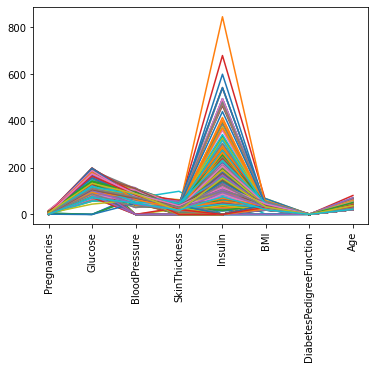

In [71]:
plt.plot(X_train.T)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

In [32]:
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [47]:
x_binarised_test_arr = x_binarised_test.values
x_binarised_train_arr = x_binarised_train.values

In [48]:
x_binarised_train.shape

(770, 8)

In [49]:
from random import randint

In [201]:
b = 3

i = randint(0, x_binarised_train_arr.shape[0])

print("For row", i)

if (np.sum(x_binarised_train_arr[100, :]) >= b):
    print("MP Neuron inference is above bias")
else:
    print("MP Neuron inference below bias")

if (Y_train[i] == 1):
    print("Ground Truth belong to class 1")
else:
    print("Ground truth belong tp class 0")

For row 33
MP Neuron inference is above bias
Ground truth belong tp class 0


In [60]:
b = 9

Y_pred_train = []
accurate_rows = 0

for x, y in zip(x_binarised_train_arr, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/x_binarised_train.shape[0])

450 0.5844155844155844


In [61]:
for b in range(x_binarised_train_arr.shape[1]+10):
    Y_pred_train = []
    accurate_rows = 0

    for x, y in zip(x_binarised_train_arr, Y_train):
        y_pred = (np.sum(x) >= b)
        Y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/x_binarised_train_arr.shape[0])

0 320 0.4155844155844156
1 320 0.4155844155844156
2 320 0.4155844155844156
3 320 0.4155844155844156
4 315 0.4090909090909091
5 281 0.36493506493506495
6 256 0.33246753246753247
7 340 0.44155844155844154
8 427 0.5545454545454546
9 450 0.5844155844155844
10 450 0.5844155844155844
11 450 0.5844155844155844
12 450 0.5844155844155844
13 450 0.5844155844155844
14 450 0.5844155844155844
15 450 0.5844155844155844
16 450 0.5844155844155844
17 450 0.5844155844155844


In [62]:
from sklearn.metrics import accuracy_score

In [63]:
b = 10

Y_pred_test = []

for x in x_binarised_test_arr:
    y_pred = (np.sum(x) >= b)
    Y_pred_test.append(y_pred)
    
accuracy = accuracy_score(Y_pred_test, Y_test)
print(b,accuracy)

10 0.5813953488372093


In [64]:
class MPNeuron:
    def __init__(self, function='sum'):
        self.threshold = None
        if function == 'sum':
            self.function = self.sum_function

    def sum_function(self, x):
        return sum(x) >= self.threshold

    def and_function(self, x):
        return all(x)

    def or_function(self, x):
        return any(x)

    def fit(self, X_DataFrame, y_DataFrame):
        threshold_accuracy_dict = {}
        for threshold in range(len(X_DataFrame.columns) + 1):
            threshold_accuracy_dict[threshold] = None
        for threshold in threshold_accuracy_dict.keys():
            self.threshold = threshold
            predictions = self.predict(X_DataFrame)
            threshold_accuracy_dict[threshold] = accuracy_score(y_DataFrame, predictions)
        self.threshold = max(threshold_accuracy_dict.items(), key=operator.itemgetter(1))[0]
        print(self.threshold, 'threshold', threshold_accuracy_dict)

    def predict(self, X_DataFrame):
        results = np.array([])
        for i in range(len(X_DataFrame)):
            result = self.function(X_DataFrame.iloc[i])
            results = np.append(results, result)
        return results

In [65]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train, Y_train)

8 threshold {0: 0.4155844155844156, 1: 0.4155844155844156, 2: 0.4155844155844156, 3: 0.4155844155844156, 4: 0.4090909090909091, 5: 0.36493506493506495, 6: 0.33246753246753247, 7: 0.44155844155844154, 8: 0.5545454545454546}


In [66]:
Y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [67]:
print(accuracy_test)

0.5581395348837209


In [90]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [91]:
df2 = pd.read_csv('pima.csv')

In [92]:
print(df2['Outcome'].value_counts())

0    500
1    356
Name: Outcome, dtype: int64


In [94]:
X = df2.drop('Outcome', axis=1)
Y = df2['Outcome']

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

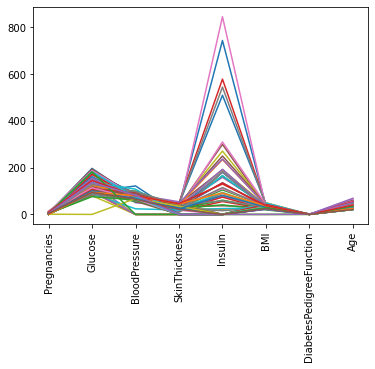

In [196]:
plt.plot(X_test.T)
plt.xticks(rotation='vertical')
plt.show()

In [197]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

In [198]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [199]:
from sklearn.metrics import accuracy_score

In [200]:
X_train = X_train.values
X_test = X_test.values

In [180]:
class perceptron:
    def __init__(self, max_iters=100):
        self.max_iters = max_iters
    
    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        iters = 0
        X = np.concatenate((X, np.asarray([[1] * X.shape[0]]).T), axis=1)

        ω = np.random.random(X.shape[1])        
        
        for _ in range(self.max_iters):
            y_pred_all = []
            for idx in range(X.shape[0]):
                x_sample, y_sample = X[idx], y[idx]
                y_pred = int(np.sum(ω * x_sample) >= 0.5)
                if y_pred == y_sample:
                    pass
                elif y_pred == 0 and y_sample == 1:
                    ω = ω + x_sample
                elif y_pred == 1 and y_sample == 0:
                    ω = ω - x_sample
                
                y_pred_all.append(y_pred)
            
            iters += 1
            if np.equal(np.array(y_pred_all), y).all():
                break
                
        self.iters, self.ω = iters, ω
        
    def predict(self, X):
        X = np.asarray(X)
        X = np.concatenate((X, np.asarray([[1] * X.shape[0]]).T), axis=1)
        
        return (X @ self.ω > 0.5).astype(int)

In [181]:
pn = perceptron()

In [182]:
pn.fit(X_train, Y_train)

In [189]:
Y_pred_test = pn.predict(X_test)
print(predict(Y_pred_test, Y_test))

0.7674418604651163
